In [98]:
# Dependencies import
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy
import requests
from datetime import datetime
import time
from scipy.stats import linregress

# Import API key
from config import weather_api_key
from config import g_key

ImportError: cannot import name 'g_key' from 'config' (f:\My Drive\Documents\Bootcamp Files\Git\World_Weather_Analysis\config.py)

In [55]:
# Create a function to perform linear regressions on the weather data
# plot the regression line, and print the equation

def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    # Run regression on hemisphere weather data
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept

    # Get the equation of the line
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept, 2))

    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values, y_values)
    plt.plot(x_values, regress_values, "r")

    # Annotate the text for the line equation
    plt.annotate(line_eq, text_coordinates, fontsize = 15, color = "red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [2]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [3]:
# Create a random set of latititude/longitudes combos.
lats = np.random.uniform(low = -90.000, high = 90.000, size = 1500)
lngs = np.random.uniform(low = -180.000, high = 180.000, size = 1500)

lat_lngs = zip(lats, lngs)

lat_lngs

In [4]:
# Create a list from the lat_lngs zip
coordinates = list(lat_lngs)

In [5]:
# Display the coordinates generated
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

35.871425681249235 69.12516396563603
88.61824378043823 -99.58615018892823
-63.224534175835586 30.40931544879453
38.71899296121455 0.26917024264960787
-43.40965695385794 -117.07659600461326
-76.36784636437008 133.87863189369364
-36.71810456247638 -58.66286001427021
-0.24707359253322636 54.34855269398935
-2.5412578286126433 153.63659372351685
-66.4047881377559 -130.1992663070751
-68.02106828814821 2.4140479903623486
73.81242266173439 101.77119211766666
-21.277742679028222 142.4327237754764
-45.502189266237416 53.130213198196884
-30.171390993279047 -177.17327614325026
22.15342773824223 -2.866067309949642
-24.85874056297824 -136.92567980225186
55.12070470693624 103.74662080773345
-62.9529883582305 -174.9275076874849
57.35872719024377 97.29480648127156
-6.419523795385118 149.86421983666457
74.37000537672816 132.42509364629115
-37.307602832257 94.81291349221817
70.27208183154355 175.79888506061445
-53.872649222397854 -89.94414793369018
70.88501095323826 -46.57565381791622
6.67358100778965 55

In [6]:
# Create a list for holding the cities.
cities = []

# Loop through the coordinates and find the closest city for each one
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # Add the city to the list if it is unique.
    if city not in cities:
        cities.append(city)

# Print the length of the unique cities list
len(cities)

617

In [7]:
# Create an empty list to hold the weather data
city_data = []

# Print the beginning of the logging
print("Beginning Data Retrieval")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through the cities in the list
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + cities[i]

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")

    # Add 1 to the record count.
    record_count += 1

# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval
-----------------------------
Processing Record 1 of Set 1 | nahrin
Processing Record 2 of Set 1 | yellowknife
Processing Record 3 of Set 1 | port elizabeth
Processing Record 4 of Set 1 | denia
Processing Record 5 of Set 1 | rikitea
Processing Record 6 of Set 1 | new norfolk
Processing Record 7 of Set 1 | tandil
Processing Record 8 of Set 1 | victoria
Processing Record 9 of Set 1 | namatanai
Processing Record 10 of Set 1 | hermanus
Processing Record 11 of Set 1 | khatanga
Processing Record 12 of Set 1 | mount isa
Processing Record 13 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 14 of Set 1 | vaini
Processing Record 15 of Set 1 | taoudenni
Processing Record 16 of Set 1 | ust-uda
Processing Record 17 of Set 1 | chunoyar
Processing Record 18 of Set 1 | kandrian
Processing Record 19 of Set 1 | tiksi
Processing Record 20 of Set 1 | busselton
Processing Record 21 of Set 1 | leningradskiy
Processing Record 22 of Set 1 | punta arenas
Processing Re

In [8]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Nahrin,36.0649,69.1334,68.70,34,16,0.96,AF,2022-07-07 23:11:15
1,Yellowknife,62.4560,-114.3525,77.56,31,0,13.00,CA,2022-07-07 23:08:31
2,Port Elizabeth,-33.9180,25.5701,58.05,87,18,5.12,ZA,2022-07-07 23:11:15
3,Denia,38.8408,0.1057,79.84,65,0,1.99,ES,2022-07-07 23:11:16
4,Rikitea,-23.1203,-134.9692,74.89,74,56,21.92,PF,2022-07-07 23:11:16
5,New Norfolk,-42.7826,147.0587,47.91,82,99,3.00,AU,2022-07-07 23:11:16
6,Tandil,-37.3217,-59.1332,40.95,38,1,6.89,AR,2022-07-07 23:11:16
7,Victoria,22.2855,114.1577,86.32,85,94,10.00,HK,2022-07-07 23:11:17
8,Namatanai,-3.6667,152.4333,82.74,72,92,12.12,PG,2022-07-07 23:11:17
9,Hermanus,-34.4187,19.2345,51.80,88,75,3.20,ZA,2022-07-07 23:11:18


In [12]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]

city_data_df = city_data_df[new_column_order]

city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Nahrin,AF,2022-07-07 23:11:15,36.0649,69.1334,68.70,34,16,0.96
1,Yellowknife,CA,2022-07-07 23:08:31,62.4560,-114.3525,77.56,31,0,13.00
2,Port Elizabeth,ZA,2022-07-07 23:11:15,-33.9180,25.5701,58.05,87,18,5.12
3,Denia,ES,2022-07-07 23:11:16,38.8408,0.1057,79.84,65,0,1.99
4,Rikitea,PF,2022-07-07 23:11:16,-23.1203,-134.9692,74.89,74,56,21.92
5,New Norfolk,AU,2022-07-07 23:11:16,-42.7826,147.0587,47.91,82,99,3.00
6,Tandil,AR,2022-07-07 23:11:16,-37.3217,-59.1332,40.95,38,1,6.89
7,Victoria,HK,2022-07-07 23:11:17,22.2855,114.1577,86.32,85,94,10.00
8,Namatanai,PG,2022-07-07 23:11:17,-3.6667,152.4333,82.74,72,92,12.12
9,Hermanus,ZA,2022-07-07 23:11:18,-34.4187,19.2345,51.80,88,75,3.20


In [14]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"

# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label = "City_ID")

In [15]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]


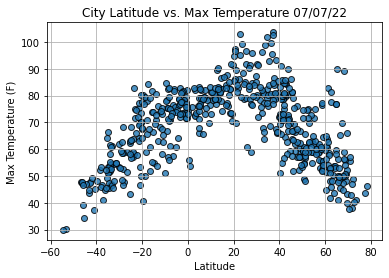

In [18]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

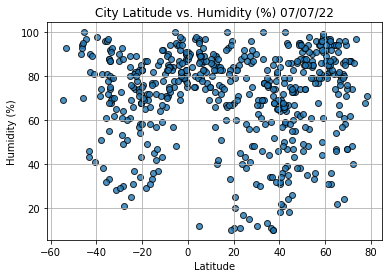

In [21]:
# Build the scatter plot for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity (%) "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()

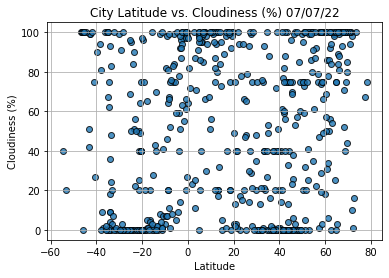

In [22]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

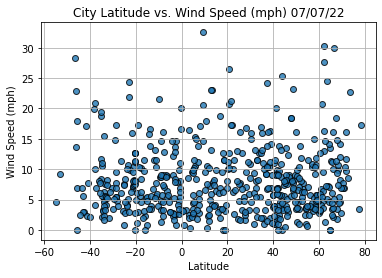

In [25]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed (mph) "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [31]:
# Create DataFrames for Northern and Southern hemispheres
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

print(northern_hemi_df.head(5))
print(southern_hemi_df.head(5))


           City Country                 Date      Lat       Lng  Max Temp  \
0        Nahrin      AF  2022-07-07 23:11:15  36.0649   69.1334     68.70   
1   Yellowknife      CA  2022-07-07 23:08:31  62.4560 -114.3525     77.56   
3         Denia      ES  2022-07-07 23:11:16  38.8408    0.1057     79.84   
7      Victoria      HK  2022-07-07 23:11:17  22.2855  114.1577     86.32   
10     Khatanga      RU  2022-07-07 23:11:18  71.9667  102.5000     48.79   

    Humidity  Cloudiness  Wind Speed  
0         34          16        0.96  
1         31           0       13.00  
3         65           0        1.99  
7         85          94       10.00  
10        40           1        9.62  
             City Country                 Date      Lat       Lng  Max Temp  \
2  Port Elizabeth      ZA  2022-07-07 23:11:15 -33.9180   25.5701     58.05   
4         Rikitea      PF  2022-07-07 23:11:16 -23.1203 -134.9692     74.89   
5     New Norfolk      AU  2022-07-07 23:11:16 -42.7826  147.0587 

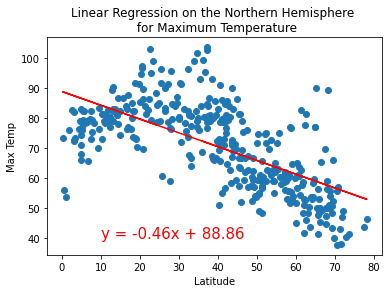

In [64]:
# Max Temp linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]

# Call the function
plot_linear_regression(x_values, y_values, "Linear Regression on the Northern Hemisphere \n for Maximum Temperature", "Max Temp", (10,40))

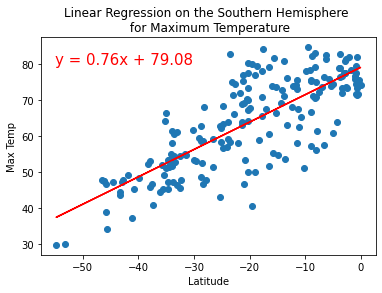

In [63]:
# Max Tempt linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]

# Call the function
plot_linear_regression(x_values, y_values, "Linear Regression on the Southern Hemisphere \n for Maximum Temperature", "Max Temp", (-55,80))

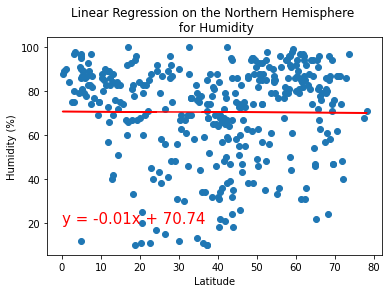

In [74]:
# Humidity linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]

# Call the function
plot_linear_regression(x_values, y_values, "Linear Regression on the Northern Hemisphere \n for Humidity", "Humidity (%)", (0,20))

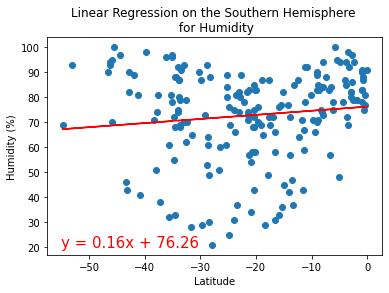

In [73]:
# Humidity linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]

# Call the function
plot_linear_regression(x_values, y_values, "Linear Regression on the Southern Hemisphere \n for Humidity", "Humidity (%)", (-55,20))

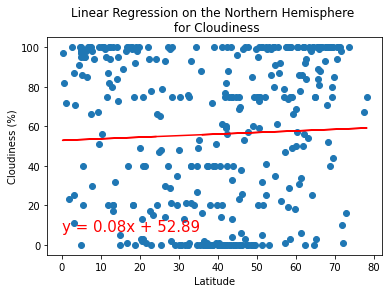

In [72]:
# Cloudiness linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]

# Call the function
plot_linear_regression(x_values, y_values, "Linear Regression on the Northern Hemisphere \n for Cloudiness", "Cloudiness (%)", (0,7))

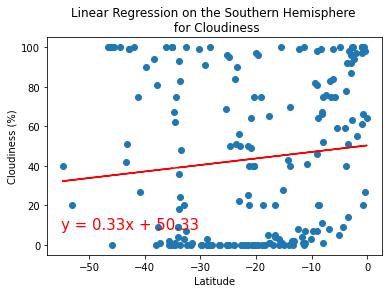

In [78]:
# Cloudiness linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]

# Call the function
plot_linear_regression(x_values, y_values, "Linear Regression on the Southern Hemisphere \n for Cloudiness", "Cloudiness (%)", (-55,8))

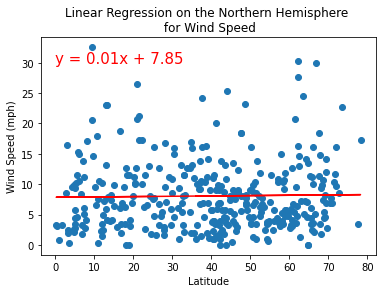

In [84]:
# Wind speed linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]

# Call the function.
plot_linear_regression(x_values, y_values, 'Linear Regression on the Northern Hemisphere \n for Wind Speed', 'Wind Speed (mph)',(0,30))

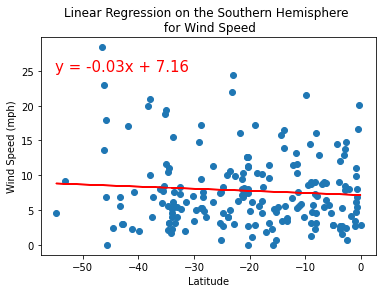

In [87]:
# Wind speed linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]

# Call the function.
plot_linear_regression(x_values, y_values, 'Linear Regression on the Southern Hemisphere \n for Wind Speed', 'Wind Speed (mph)',(-55,25))

In [92]:
print(g_key)

NameError: name 'g_key' is not defined